<a href="https://colab.research.google.com/github/leonansacchi/Analise_Dados/blob/main/EDA_TBDM_5000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

> ### Fonte: 
>***
https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv


>### Descrição:
>***
Nesse dataset disponibilizado pelo Kaggle temos um conjunto de dados sobre filmes, desde orçamentos e receitas até popularidades e notas avaliadas pelos espectadores.
>
>Nosso objetivo é realizar uma análise exploratória, a fim de visualizarmos correlações, analisarmos estatísticas descritivas, respondermos questões que podem surgir e testarmos hipóteses.


>### Dados:
>***

|Campo|Descrição|
|---|---|
|budget|Orçamento do filme em dólares|
|genres|Gênero|
|homepage|Página da web|
|id|Identificação|
|keywords|Palavras-chaves|
|original_languague|Idioma original|
|original_title|Título original sem tradução|
|overview|Resumo|
|popularity|Popularidade|
|production_companies|Produtora|
|production_countries|País de origem|
|release_date|Data de lançamento|
|revenue|Receita em dólares|
|spoken_language|Idioma falado|
|status|Status|
|tagline|tagline|
|title|Título|
|vote_count|Quantidade de votos|
|vote_average|Nota média|

## **Importando bibliotecas**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest, mannwhitneyu

sns.set_palette('Blues_r')
sns.set_style('ticks')

##**Importando o dataset**

In [ ]:
dataset = pd.read_csv('tmdb_5000_movies.csv')

##**Visualizando o dataset**

In [ ]:
dataset.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


##**Informações e estatísticas descritivas**

In [ ]:
dataset.shape

(4803, 20)

In [ ]:
dataset.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [ ]:
dataset.describe().round(1)

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.0,4803.0,4803.0,4.803000e+03,4801.0,4803.0,4803.0
mean,29045039.9,57165.5,21.5,8.226064e+07,106.9,6.1,690.2
std,40722391.3,88694.6,31.8,1.628571e+08,22.6,1.2,1234.6
min,0.0,5.0,0.0,0.000000e+00,0.0,0.0,0.0
25%,790000.0,9014.5,4.7,0.000000e+00,94.0,5.6,54.0
50%,15000000.0,14629.0,12.9,1.917000e+07,103.0,6.2,235.0
75%,40000000.0,58610.5,28.3,9.291719e+07,118.0,6.8,737.0
max,380000000.0,459488.0,875.6,2.787965e+09,338.0,10.0,13752.0


A princípio conseguimos localizar alguns problemas em nossos dados, é estranho termos filmes com nota média de 0 e 10, percebemos também que todos os campos com exceção do id tem valores mínimos igual a 0. Isso pode significar um problema. Vamos nos atentar e seguir em frente.

##**Limpeza e tratamento do dataset**

Como não utilizaremos todos os campos, vamos retira-los do dataset

In [ ]:
dataset = dataset.drop(['homepage', 'genres', 'keywords', 'overview', 'production_countries', 'spoken_languages', 'tagline', 'original_title', 'status'], axis = 1)

In [ ]:
dataset.head()

,budget,id,original_language,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,19995,en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,285,en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,206647,en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,49026,en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,49529,en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,John Carter,6.1,2124


##**Análise exploratória - EDA**

###**Nota média**

Como vimos no resumo estatístico é estranho termos filmes com notas médias de 0 e 10, vamos analisar mais afundo esses dados.

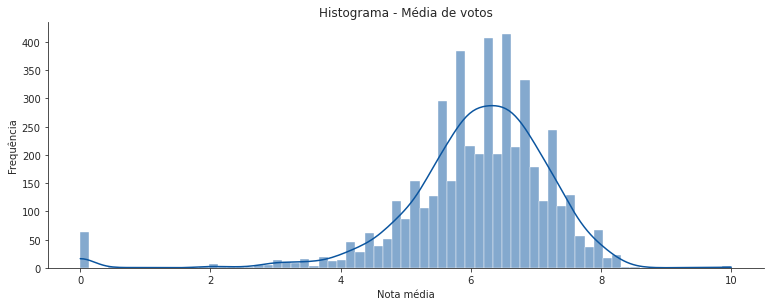

In [ ]:
sns.displot(data = dataset['vote_average'], kde = True).set(title='Histograma - Média de votos', ylabel='Frequência', xlabel='Nota média').figure.set_size_inches(12,4)

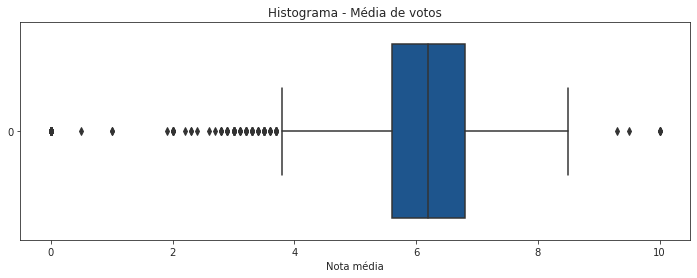

In [ ]:
plt.figure(figsize=(12,4))
_, fig = sns.boxplot(data = dataset['vote_average'], orient = 'h').set(title='Histograma - Média de votos', xlabel='Nota média')

Nos gráficos acima conseguimos observar os outilers. Vamos analisar a quantidade de votos que os filmes com notas média 0 e 10 tiveram.

In [ ]:
dataset.query('vote_average == 0')[['vote_average', 'vote_count']].head(5)

,vote_average,vote_count
1464,0.0,0
3669,0.0,0
3670,0.0,0
3852,0.0,0
3855,0.0,0


In [ ]:
dataset.query('vote_average == 10')[['vote_average', 'vote_count']]

,vote_average,vote_count
3519,10.0,1
4045,10.0,1
4247,10.0,2
4662,10.0,1


Fica evidente então que os filmes com notas médias de 0 ou 10 obtiveram essas notas devido ao baixo número de votos. Assim é necessário retirá-los da nossa análise. Vamos então selecionar apenas filmes com 10 ou mais votos.

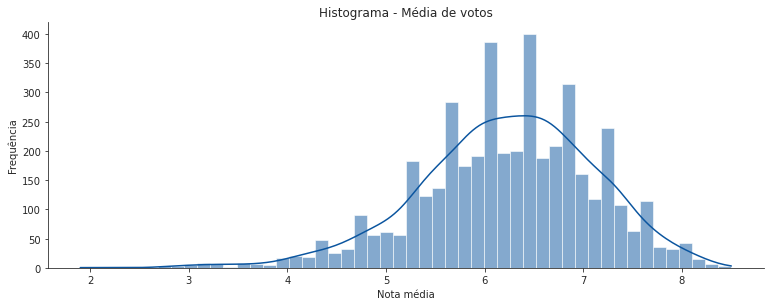

In [ ]:
sns.displot(data = dataset.query('vote_count >= 10')['vote_average'], kde = True).set(title='Histograma - Média de votos', ylabel='Frequência', xlabel='Nota média').figure.set_size_inches(12,4)

Após o tratamento dos dados, retirando filmes com poucos votos, temos a estatística descritiva dos filmes representados abaixo com a diferença dos dados.

In [ ]:
pd.DataFrame([dataset['vote_average'].describe().round(1), dataset.query('vote_count >= 10')['vote_average'].describe().round(1), (dataset['vote_average'].describe().round(1) - dataset.query('vote_count >= 10')['vote_average'].describe().round(1))], ['Notas sem tratamento', 'Notas com tratamento', 'Diferença'])

,count,mean,std,min,25%,50%,75%,max
Notas sem tratamento,4803.0,6.1,1.2,0.0,5.6,6.2,6.8,10.0
Notas com tratamento,4392.0,6.2,0.9,1.9,5.7,6.3,6.8,8.5
Diferença,411.0,-0.1,0.3,-1.9,-0.1,-0.1,0.0,1.5


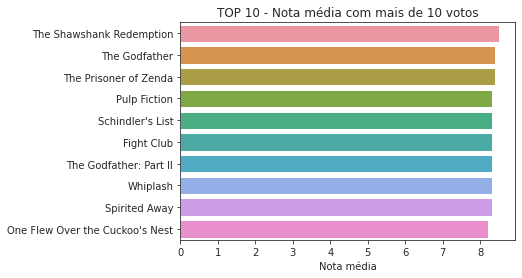

In [ ]:
_,_,_ = sns.barplot(data=dataset.query('vote_count > 10').sort_values('vote_average', ascending=False).head(10), x='vote_average', y='title').set(title='TOP 10 - Nota média com mais de 10 votos', ylabel='', xlabel='Nota média')

###**Qual o idioma mais falado ?**

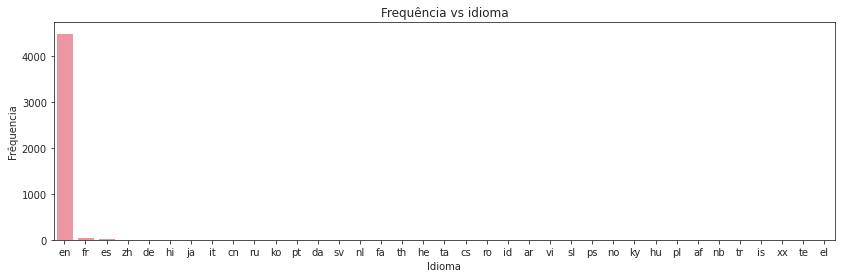

In [ ]:
plt.figure(figsize=(14,4))
_,_,_ = sns.countplot(x = dataset['original_language'], order = dataset['original_language'].value_counts().index).set(title='Frequência vs idioma', xlabel='Idioma', ylabel='Frêquencia')

###**Retirando o inglês, como fica a distribuição dos idiomas falados ?**

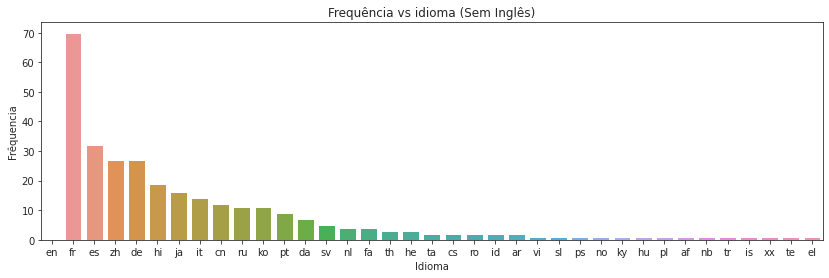

In [ ]:
plt.figure(figsize=(14,4))
_,_,_ = sns.countplot(x = dataset.query('original_language != "en"')['original_language'], order = dataset['original_language'].value_counts().index).set(title='Frequência vs idioma (Sem Inglês)', xlabel='Idioma', ylabel='Frêquencia')

In [ ]:
dataset.original_language.value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


###**Quais os filmes mais populares ?**

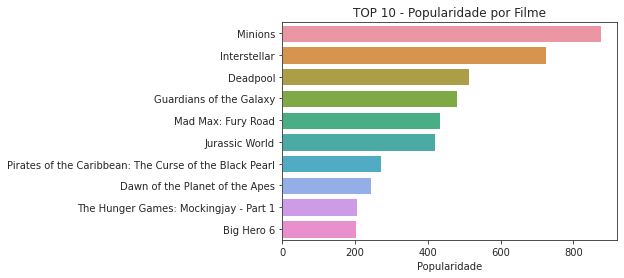

In [ ]:
_,_,_ = sns.barplot(data=dataset.query('vote_count > 10').sort_values('popularity', ascending=False).head(10), x='popularity', y='title').set(title='TOP 10 - Popularidade por Filme', xlabel='Popularidade', ylabel='')

###**Quais os filmes que mais geraram receitas ?**

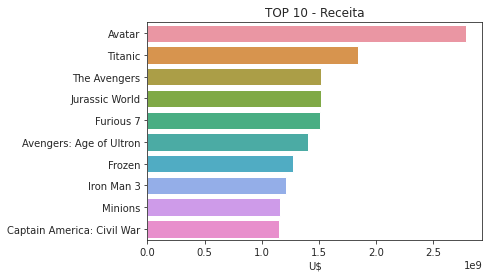

In [ ]:
_,_,_ = sns.barplot(data=dataset.query('vote_count > 10').sort_values('revenue', ascending=False).head(10), x='revenue', y='title').set(title='TOP 10 - Receita', xlabel='U$', ylabel='')

###**Quais os filmes com maiores orçamentos ?**

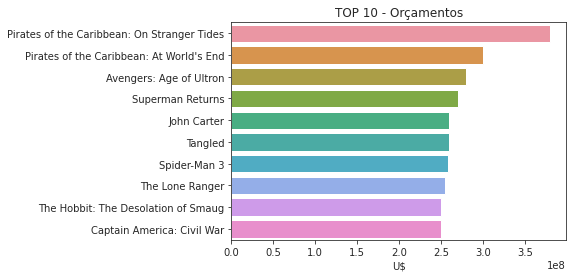

In [ ]:
_,_,_ = sns.barplot(data=dataset.query('vote_count > 10').sort_values('budget', ascending=False).head(10), x='budget', y='title').set(title='TOP 10 - Orçamentos', xlabel='U$', ylabel='')

###**Quais produtoras tiveram as maiores arrecadaçõs anuais ?**

#### Tratamento dos dados

In [ ]:
dataset['production_companies']

0       [{"name": "Ingenious Film Partners", "id": 289...
1       [{"name": "Walt Disney Pictures", "id": 2}, {"...
2       [{"name": "Columbia Pictures", "id": 5}, {"nam...
3       [{"name": "Legendary Pictures", "id": 923}, {"...
4             [{"name": "Walt Disney Pictures", "id": 2}]
                              ...                        
4798             [{"name": "Columbia Pictures", "id": 5}]
4799                                                   []
4800    [{"name": "Front Street Pictures", "id": 3958}...
4801                                                   []
4802    [{"name": "rusty bear entertainment", "id": 87...
Name: production_companies, Length: 4803, dtype: object

In [ ]:
dataset.production_companies = dataset.production_companies.str.split(":",n=2,expand=True)[1]
dataset['production_companies'] = dataset['production_companies'].fillna(0)
dataset['production_companies'] = dataset['production_companies'].str.split(",",n=1,expand=True)[0]
dataset['production_companies'] = dataset['production_companies'].str.replace('"', '')
dataset['production_companies'] = dataset['production_companies'].str.strip()
dataset['production_companies']

0        Ingenious Film Partners
1           Walt Disney Pictures
2              Columbia Pictures
3             Legendary Pictures
4           Walt Disney Pictures
                  ...           
4798           Columbia Pictures
4799                         NaN
4800       Front Street Pictures
4801                         NaN
4802    rusty bear entertainment
Name: production_companies, Length: 4803, dtype: object

#### Extraindo o ano, meses e dia da semana das datas

In [ ]:
dataset['release_date'] = pd.to_datetime(dataset['release_date'])
dataset['year'] = dataset['release_date'].dt.year
dataset['year'] = dataset['year'].fillna(0).astype(int)
dataset['month'] = dataset['release_date'].dt.month
dataset['month'] = dataset['month'].fillna(0).astype(int)
dataset['day'] = dataset['release_date'].dt.day_name()

####Maiores receitas anuais por produtora

In [ ]:
receita_produtoras = dataset[['production_companies', 'revenue', 'year']]
receita_produtoras.groupby(['production_companies', 'year']).sum().sort_values('revenue', ascending=False).head(5)

,,revenue
production_companies,year,
Universal Pictures,2015,3766248329
Walt Disney Pictures,2010,3695008268
Columbia Pictures,2012,3342704706
Paramount Pictures,2011,3165881923
Ingenious Film Partners,2009,3161027951


####Filmes da Universal Pictures em 2015

In [ ]:
dataset.query('production_companies == "Universal Pictures" and year == 2015').sort_values('revenue', ascending = False)[['title', 'revenue']]

,title,revenue
44,Furious 7,1506249360
546,Minions,1156730962
1683,Pitch Perfect 2,287506194
616,Ted 2,217022588
671,Everest,203427584
1371,Trainwreck,140795793
2123,Spotlight,88346473
2540,Krampus,61548707
3746,The Boy Next Door,52425855
2354,Steve Jobs,34441873


###**Existe uma preferência de data para o lançamento do filme ?**

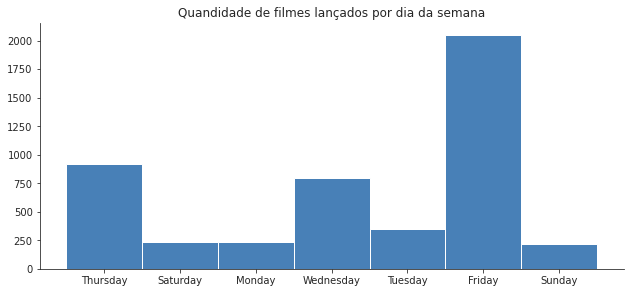

In [ ]:
sns.displot(data = dataset['day']).set(title='Quandidade de filmes lançados por dia da semana', xlabel="", ylabel="").figure.set_size_inches(10,4)

Como esperado e por motivos óbvios, a sexta-feira é o dia preferencial para um lançamento. O interessante é o baixo nível de filmes lançados aos sábados.

###**Existe uma correlação entre orçamento e receita ?**

Para melhorar nossa análise de correlação vamos excluir as linhas com valores de orçamento e receita menor que U$10

In [ ]:
dataset = dataset.drop(dataset.query('budget < 10').index)
dataset = dataset.drop(dataset.query('revenue < 10').index)

In [ ]:
dataset.corr()['budget']['revenue']

0.7051252174806047

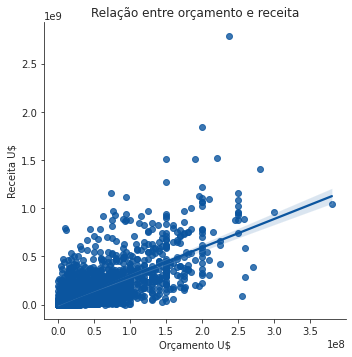

In [ ]:
sns.lmplot(data=dataset, y='revenue', x='budget').set(title='Relação entre orçamento e receita', xlabel='Orçamento U$', ylabel='Receita U$')

Percebemos que na escala Person temos uma relação positiva considerada forte, cerca de 0,7, graficamente também percebemos essa relação. É importante ressaltar que quando observamos os orçamentos mais elevados o gráfico tende a se dispersar mais, talvez aplicando uma escala logarítima nos dados teríam uma menor dispersão, uma vez que os dados analisados não se distribuem normalmente.

###**Filmes com maiores orçamentos tiveram uma nota melhor ? (Teste de hipótese)**

Vamos testar a hipótese que os filmes com maiores orçamentos têm nota média de avaliação dentro do especificado no nosso dataset, vamos considerar um intervalo de confiança de 95%

 $\mu_1 \Rightarrow$ Média das notas dos filmes com maiores orçamentos
 
 $\mu_2 \Rightarrow$ Média das notas do dataset


 $
\begin{cases}
H_0: \mu_1 = \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

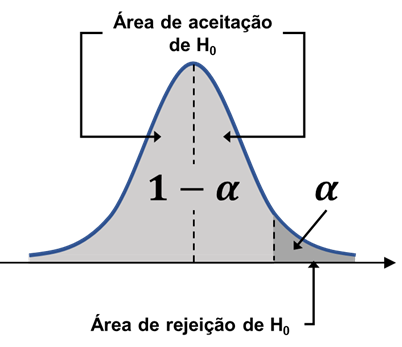

In [ ]:
top_20_orcamentos = dataset.sort_values('budget', ascending=False).head(20)['vote_average']
dataset_notas = dataset.query('vote_count > 10')['vote_average']

####Os dados se distribuem normalmente ?

O primeiro passo é analisar se o campo de notas médias do nosso dataset se distriuem normalmente, isso é necessário para escolhermos o teste que vamos aplicar

In [ ]:
_, p_value_normal = normaltest(dataset_notas) #O normaltest testa a hipótese nula que os dados se distribuem normalmente
p_value_normal

1.0606342261307889e-19

Portanto vamos rejeitar H0 (hipótese nula) que os dados se distriuem normalmente. Como nossas amostras não são pareadas, ou seja, não são dependetes, usaremos o teste não-paramétrico de **Mann-Whitneyu** para comparar os dados. 

####Filmes com maiores orçamentos

In [ ]:
dataset.sort_values('budget', ascending=False).head(20)[['id', 'title', 'vote_average', 'budget']]

,id,title,vote_average,budget
17,1865,Pirates of the Caribbean: On Stranger Tides,6.4,380000000
1,285,Pirates of the Caribbean: At World's End,6.9,300000000
7,99861,Avengers: Age of Ultron,7.3,280000000
10,1452,Superman Returns,5.4,270000000
4,49529,John Carter,6.1,260000000
6,38757,Tangled,7.4,260000000
5,559,Spider-Man 3,5.9,258000000
13,57201,The Lone Ranger,5.9,255000000
98,49051,The Hobbit: An Unexpected Journey,7.0,250000000
26,271110,Captain America: Civil War,7.1,250000000


####Significância

In [ ]:
alpha = 0.05

####Média de notas dos TOP 20 maiores orçamentos

In [ ]:
media_top_orcamentos = top_20_orcamentos.mean()
media_top_orcamentos

6.714999999999999

####Média das notas do dataset

In [ ]:
media_dataset = dataset_notas.mean() #Retiramos os filmes com menos de dez votos
media_dataset

6.322313268200437

####Graficamente

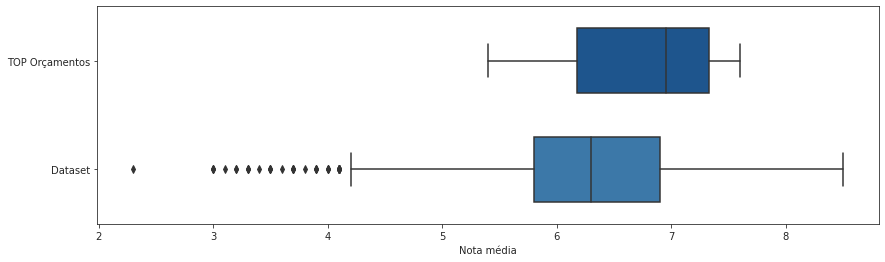

In [ ]:
plt.figure(figsize=(14,4))
_,_ = sns.boxplot(data=[top_20_orcamentos, dataset_notas], orient='h', width= 0.6).set(yticklabels=['TOP Orçamentos','Dataset'], xlabel='Nota média')

####p_value

In [ ]:
_, p_valor = mannwhitneyu(top_20_orcamentos, dataset_notas, alternative = 'greater' )
print(p_valor)

0.017523850109832838


####Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
p_valor <= alpha

True

In [ ]:
if (p_valor <= alpha):
  print('Rejeitar H0,  portanto rejeitamos a hipótese nula que os filmes com maiores orçamentos têm nota média igual ao dataset')
else:
  print('Aceitar H0')

Rejeitar H0,  portanto rejeitamos a hipótese nula que os filmes com maiores orçamentos têm nota média igual ao dataset


##**Conclusão**

Concluímos através da analise do dataset quais são os filmes campeões de notas, orçamento gasto, receita arrecadada e popularidade. Avaliamos que existe uma forte relação positiva entre orçamento e receita. Comparamos as produtoras com maiores receitas anuais e visualizamos que existe uma preferência de data para lançamento de filmes. E por fim, testamos e comprovamos estatisticamente a hipótese de que filmes com orçamentos maiores tem nota média superior ao nosso banco de dados.